# **1. Objective**
---
*   **Overview:** *In this case study, we combine probability and statistics, linear regression, and logistic regression. Our goal is to demonstrate how these ideas interact to predict outcomes using real-world data from the Titanic dataset.*

*  **Goal:** *Using the Titanic dataset, our goal is to make predictions on survivability. To do this, we will employ linear and logistic regression models. Not only do we want to make predictions, but we also want to know why particular things happen. This study explains how to use these strategies for data analysis and interpretation in practice.*


# **2. Dataset Preparation**
---
*   **Description:** *This case study makes use of the Titanic dataset, which was obtained from Kaggle. It provides information about Titanic passengers, including age, class, fare, and survival rate. The dependent variable, or the result we seek to forecast, is usually survival. Independent variables include age, gender, class, and ticket price.*


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

### **Load the Dataset**

In [140]:
data = pd.read_csv("tested.csv")

### **Missing Values**

In [141]:
print("Missing values before handling:")
data.isnull().sum()

Missing values before handling:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### **Encode Categorical Variables**

In [142]:
data.dropna(inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

### **Feature Selection**

In [143]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

### **Data Splitting**

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [146]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [147]:
linear_accuracy = accuracy_score(y_test, [round(pred) for pred in linear_predictions])
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

In [148]:
print("Linear Regression Accuracy:", linear_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)

Linear Regression Accuracy: 1.0
Logistic Regression Accuracy: 1.0


# **3. Exploratory Data Analysis (EDA)**

### **Probability and Statistics Concepts**

In [149]:
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,0.505747,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.502865,0.435954,0.502865,15.218730,0.637214,0.860801,88.177319
min,904.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,0.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,1.000000,3.000000,1.000000,76.000000,3.000000,4.000000,512.329200


### **Visualizations**

In [150]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

correlation_matrix = data[numeric_cols].corr()

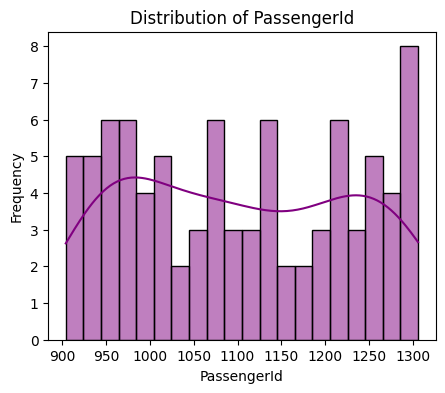

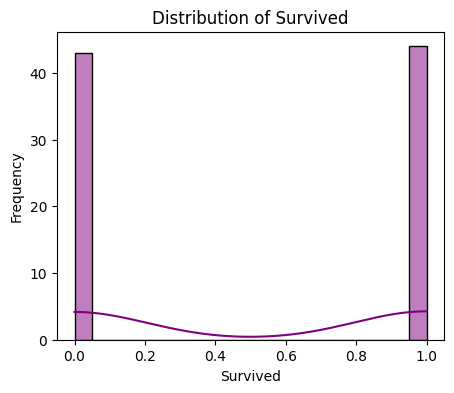

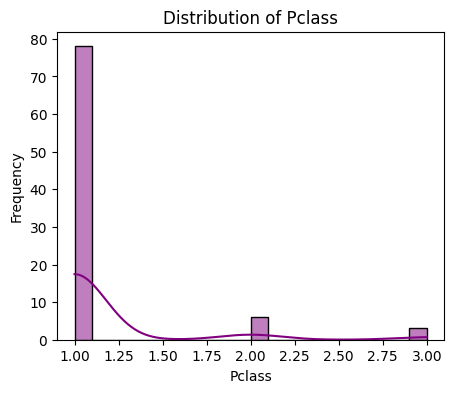

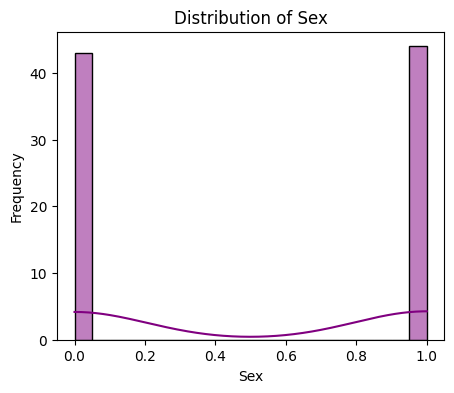

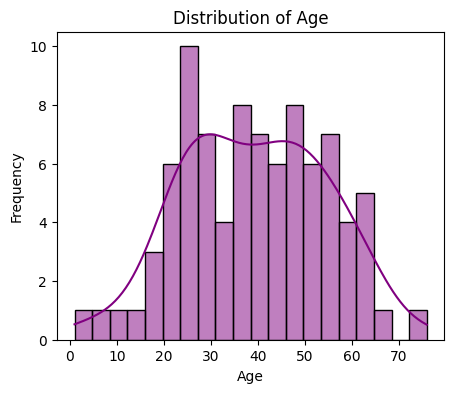

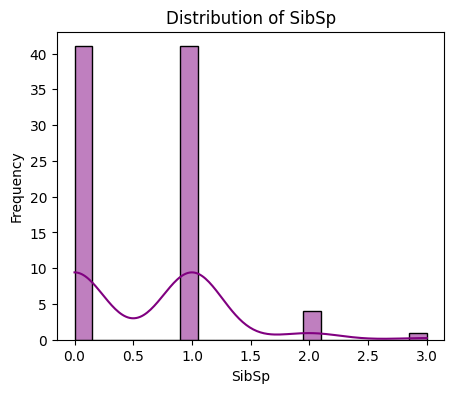

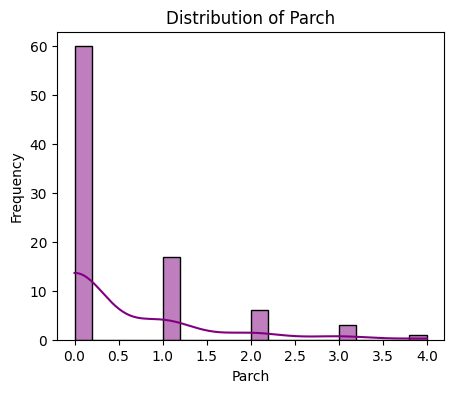

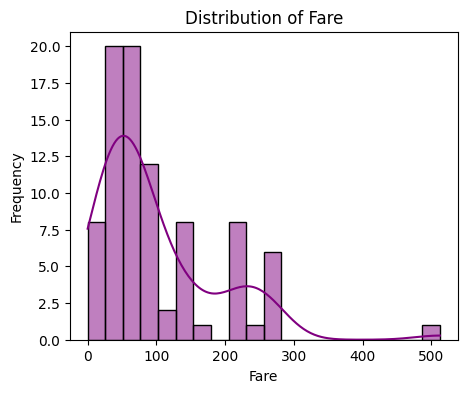

In [151]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(data[col], kde=True, bins=20, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 1000x800 with 0 Axes>

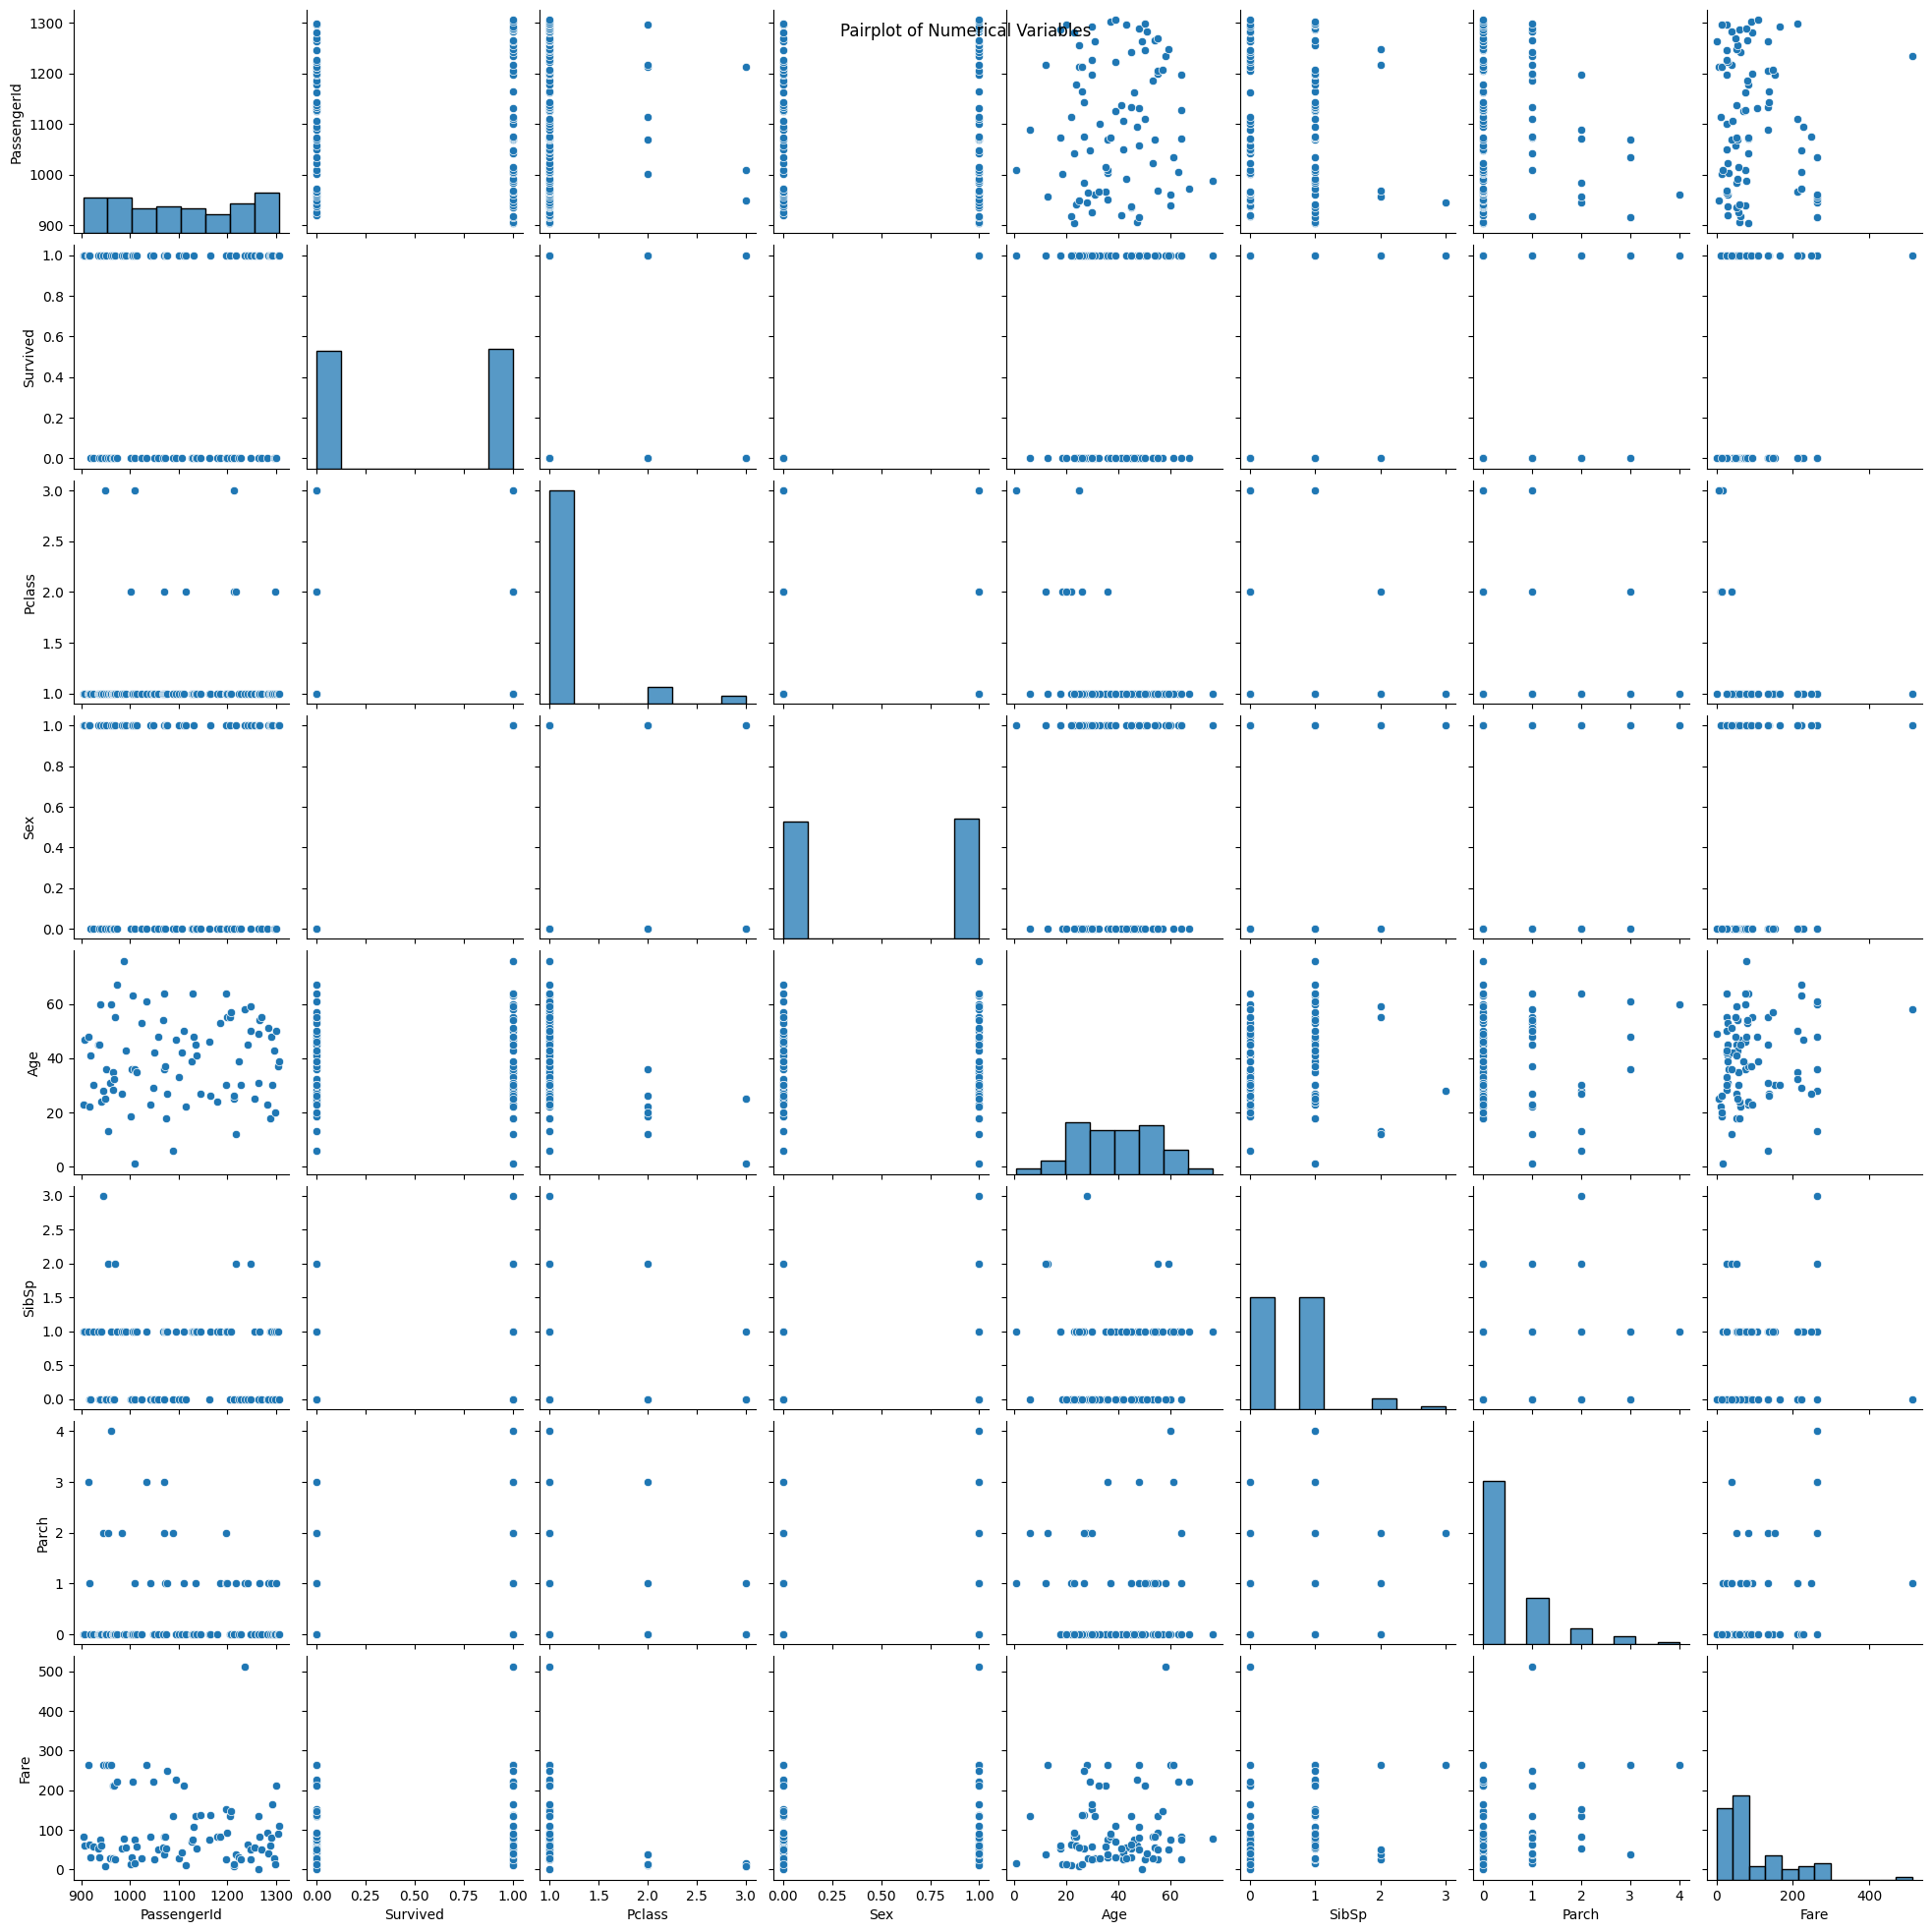

In [152]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[numeric_cols])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

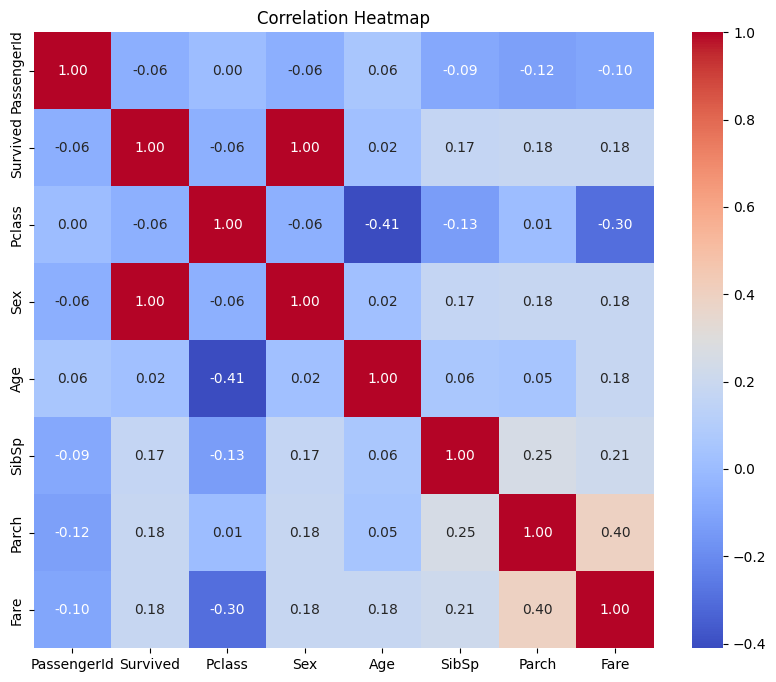

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **4. Linear Regression Model**


In [154]:
X = data[['PassengerId']]
y = data['Survived']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [156]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.47682948383184587
Coefficients: [1.45095622e-05]


In [157]:
y_pred = model.predict(X_test)

In [158]:
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: -0.018132251472803063
Mean Squared Error: 0.2513906793760008
Root Mean Squared Error: 0.5013887507473624


# **5. Logistic Regression Model**

In [159]:
X = data[['PassengerId']]
y = data['Survived']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [161]:
coefficients = model.coef_
intercept = model.intercept_

In [162]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-2.54276645e-05]]
Intercept: [-4.33270423e-08]


In [163]:
y_pred = model.predict(X_test)

In [164]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.4444444444444444
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

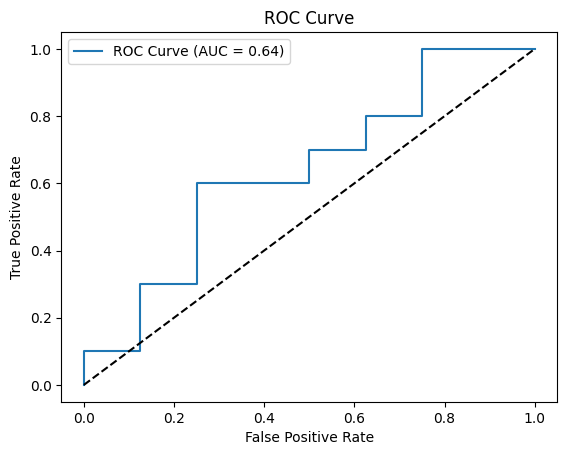

In [166]:
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **6. Model Comparison and Selection**

***1. Compare the Linear and Logistic Regression models based on their performance metrics, discussing each model's suitability for different types of prediction problems.***

- Linear regression is commonly used for predicting continuous numerical values, making it appropriate for jobs such as forecasting housing prices, stock prices, and temperature changes. Metrics like R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are used to assess its performance. Logistic regression, on the other hand, is typically used for binary classification issues with categorical outcomes, such as predicting if an email is spam or whether a patient has an illness. Accuracy, Precision, Recall, and Area Under the Receiver Operating Characteristic Curve (AUC-ROC) are performance indicators used in the field of logistic regression. As a result, the decision between Linear and Logistic Regression is determined by the kind of prediction problem: Linear Regression for continuous outcomes and Logistic Regression for binary classification jobs.

***2. Explain the decision-making process for choosing one model over the other, considering factors like model accuracy, interpretability, and assumptions.***

- A number of variables influence the decision between linear and logistic regression. Linear regression is appropriate for continuous outcomes, but logistic regression is better suited for binary classification problems. Linear regression coefficients are easy to grasp since they directly indicate variable correlations, but logistic regression coefficients show log chances, which might be less intuitive. Both models have assumptions that must be assessed, such as linearity and observational independence. The decision should be based on the nature of the data, the prediction goal, and the significance of interpretability and assumptions.

# **7. Conclusion and Insights**


- The case study concluded by demonstrating how well statistical and machine learning techniques support data-driven decision-making. Linear and Logistic Regression approaches were used to extract significant insights from the data, assisting in informed decision-making processes. These techniques made it possible to identify important factors and forecast results, which advanced our knowledge of the underlying patterns in the dataset. Furthermore, the interpretability of these models enabled straightforward communication of findings to stakeholders. Anticipating future developments, these models will find widespread use in a variety of industries where predictive analytics is essential, including marketing, finance, healthcare, and more. However, it is critical to recognize the assumptions and limits of these models in order to ensure that the findings reached are accurate and actionable.

# **8. References**


Here are the references:

1. Titanic Dataset: https://www.kaggle.com/datasets/brendan45774/test-file
2. Python Libraries:
   - numpy: https://numpy.org/
   - pandas: https://pandas.pydata.org/
   - matplotlib: https://matplotlib.org/
   - seaborn: https://seaborn.pydata.org/
   - scikit-learn: https://scikit-learn.org/stable/
